In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
#import requests
import math
#from termcolor import colored as cl 
import numpy as np
import sys

In [2]:
stock_data = pd.read_csv("BANDHANBNK.csv")
stock_data.head(2)

,Date,Open,High,Low,Close,Volume
0,2020-01-01,509.074605,510.021409,499.30772,501.300964,5.220273e+05
1,2020-01-02,501.251154,501.251154,493.57715,497.314484,1.841966e+06


In [3]:
stock_data = stock_data.set_index("Date")
stock_data = stock_data.drop(["Volume"], axis=1)
stock_data.head(2)

,Open,High,Low,Close
Date,,,,
2020-01-01,509.074605,510.021409,499.30772,501.300964
2020-01-02,501.251154,501.251154,493.57715,497.314484


In [4]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

stock_data['sma_20'] = sma(stock_data['Close'], 20)
stock_data = stock_data.dropna(how = "any")
stock_data.head(2)

,Open,High,Low,Close,sma_20
Date,,,,,
2020-01-28,473.395548,475.388792,458.446215,460.738434,487.114052
2020-01-29,463.429322,464.425944,443.746034,449.626099,484.530309


In [5]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

stock_data['upper_bb'], stock_data['lower_bb'] = bb(stock_data['Close'], stock_data['sma_20'], 20)
stock_data = stock_data.dropna(how = "any")
stock_data.head(2)

,Open,High,Low,Close,sma_20,upper_bb,lower_bb
Date,,,,,,,
2020-02-25,417.584707,424.511244,400.642129,402.535706,436.784633,474.374403,399.194862
2020-02-26,413.598228,421.571206,389.978269,392.768829,433.386153,474.024013,392.748292


In [6]:
stock_data["Date"] = stock_data.index
stock_data

,Open,High,Low,Close,sma_20,upper_bb,lower_bb,Date
Date,,,,,,,,
2020-02-25,417.584707,424.511244,400.642129,402.535706,436.784633,474.374403,399.194862,2020-02-25
2020-02-26,413.598228,421.571206,389.978269,392.768829,433.386153,474.024013,392.748292,2020-02-26
2020-02-27,393.665759,404.628603,385.991756,397.452911,430.777493,473.662111,387.892876,2020-02-27
2020-02-28,383.898890,387.436887,368.750220,382.204620,428.076646,476.022831,380.130461,2020-02-28
2020-03-02,394.463052,405.475746,383.699545,392.718964,425.271153,474.649544,375.892762,2020-03-02
...,...,...,...,...,...,...,...,...
2023-06-23,239.199997,243.399994,234.899994,235.750000,256.362502,276.708325,236.016679,2023-06-23
2023-06-26,236.600006,239.500000,233.500000,236.550003,254.982502,276.795470,233.169534,2023-06-26
2023-06-27,237.699997,240.850006,236.600006,238.000000,253.497501,275.705334,231.289668,2023-06-27


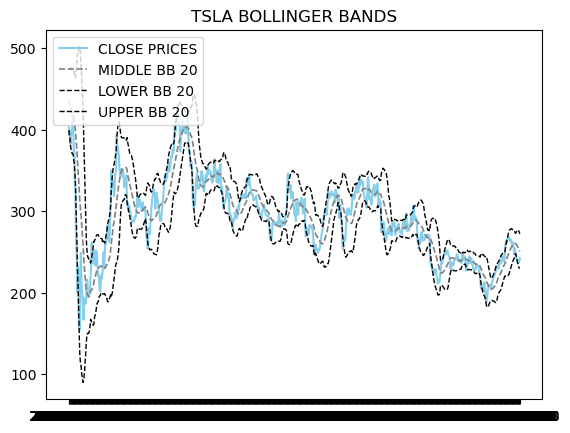

In [7]:
plt.plot(stock_data["Close"], label = 'CLOSE PRICES', color = 'skyblue')
plt.plot(stock_data["sma_20"], label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
plt.plot(stock_data["lower_bb"], label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.plot(stock_data["upper_bb"], label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('TSLA BOLLINGER BANDS')
#plt.grid()
plt.show()

In [8]:
def implement_bb_strategy(data, lower_bb, upper_bb, date):
    buy_price = []
    sell_price = []
    bb_signal = []
    list_date = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                list_date.append(date[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                list_date.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                list_date.append(np.nan)
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                list_date.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            list_date.append(np.nan)
            
    return buy_price, sell_price, bb_signal, list_date

buy_price, sell_price, bb_signal, list_date = implement_bb_strategy(stock_data['Close'], stock_data['lower_bb'], 
                                                         stock_data['upper_bb'], stock_data["Date"])

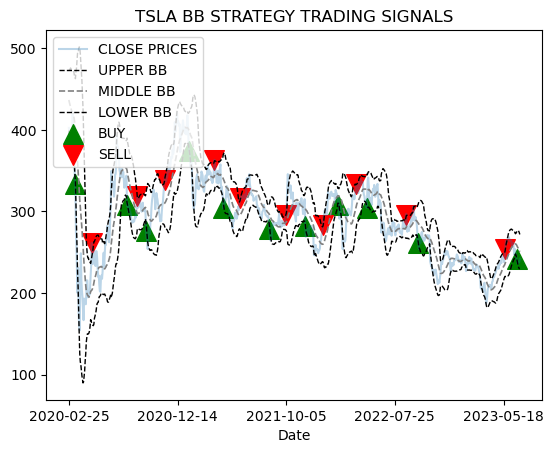

In [9]:
stock_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
stock_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
stock_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
stock_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(stock_data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(stock_data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('TSLA BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
len(buy_price), len(sell_price), len(bb_signal)
buy_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 333.8186340332031,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 307.7569274902344,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 276.2637023925781,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [11]:
df_strategy = pd.DataFrame()
df_strategy["Buy"] = buy_price
df_strategy["Sell"] = sell_price
df_strategy["Date"] = list_date
#df_strategy["Signal"] = bb_signal

In [17]:
#df_trade = df_strategy[["Buy", "Sell"]].dropna(how = "all").reset_index(drop=True)
df_trade = df_strategy.dropna(how = "all").reset_index(drop=True)
df_trade

,Buy,Sell,Date
0,333.818634,NaN,2020-03-12
1,NaN,261.463837,NaN
2,307.756927,NaN,2020-08-03
3,NaN,318.968933,NaN
4,276.263702,NaN,2020-09-21
5,NaN,338.951233,NaN
6,373.833008,NaN,2021-01-13
7,NaN,363.418274,NaN
8,303.870117,NaN,2021-04-19
9,NaN,316.626892,NaN


In [18]:
df_trade["Sell"] = df_trade["Sell"].shift(-1)
df_trade = df_trade.dropna(how = "any")
df_trade = df_trade.reset_index(drop=True)
df_trade

,Buy,Sell,Date
0,333.818634,261.463837,2020-03-12
1,307.756927,318.968933,2020-08-03
2,276.263702,338.951233,2020-09-21
3,373.833008,363.418274,2021-01-13
4,303.870117,316.626892,2021-04-19
5,278.149994,295.350006,2021-08-20
6,282.649994,283.649994,2021-11-26
7,307.600006,333.450012,2022-02-22
8,304.149994,295.750000,2022-05-12
9,261.549988,253.800003,2022-09-26


In [19]:
df_trade["PnL"] = df_trade["Sell"] - df_trade["Buy"]
df_trade["Profit"] = (df_trade["PnL"]/df_trade["Buy"])*100
df_trade

,Buy,Sell,Date,PnL,Profit
0,333.818634,261.463837,2020-03-12,-72.354797,-21.674883
1,307.756927,318.968933,2020-08-03,11.212006,3.643137
2,276.263702,338.951233,2020-09-21,62.687531,22.691193
3,373.833008,363.418274,2021-01-13,-10.414734,-2.785932
4,303.870117,316.626892,2021-04-19,12.756775,4.198101
5,278.149994,295.350006,2021-08-20,17.200012,6.183718
6,282.649994,283.649994,2021-11-26,1.000000,0.353794
7,307.600006,333.450012,2022-02-22,25.850006,8.403773
8,304.149994,295.750000,2022-05-12,-8.399994,-2.761793
9,261.549988,253.800003,2022-09-26,-7.749985,-2.963099


In [20]:
df_trade["CumProfit"] = df_trade["Profit"].cumsum()
df_trade

,Buy,Sell,Date,PnL,Profit,CumProfit
0,333.818634,261.463837,2020-03-12,-72.354797,-21.674883,-21.674883
1,307.756927,318.968933,2020-08-03,11.212006,3.643137,-18.031746
2,276.263702,338.951233,2020-09-21,62.687531,22.691193,4.659447
3,373.833008,363.418274,2021-01-13,-10.414734,-2.785932,1.873515
4,303.870117,316.626892,2021-04-19,12.756775,4.198101,6.071616
5,278.149994,295.350006,2021-08-20,17.200012,6.183718,12.255335
6,282.649994,283.649994,2021-11-26,1.000000,0.353794,12.609129
7,307.600006,333.450012,2022-02-22,25.850006,8.403773,21.012902
8,304.149994,295.750000,2022-05-12,-8.399994,-2.761793,18.251109
9,261.549988,253.800003,2022-09-26,-7.749985,-2.963099,15.288010


In [21]:
np.sum(df_trade["Profit"])/9

1.6986677689545513